### Heart Disease Prediction

In [21]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import time
from IPython.display import display, clear_output
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [22]:
# Load the dataset
df = pd.read_csv('data/heart_disease_data.csv')

# Display the first few rows of the dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##### Exploratory Data Analysis

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [24]:
df.describe()   

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


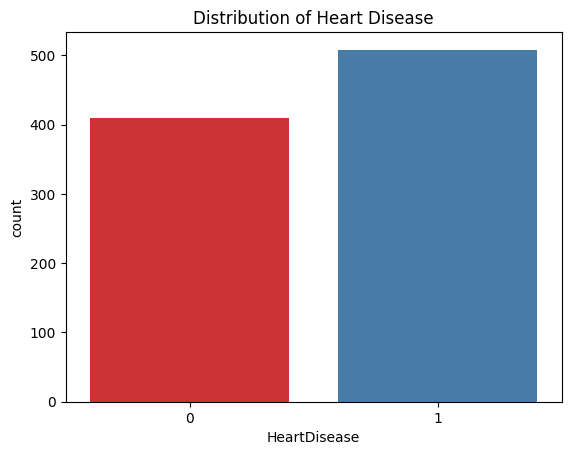

In [25]:
sns.countplot(x='HeartDisease', hue='HeartDisease', data=df, palette='Set1', legend=False)
plt.title('Distribution of Heart Disease')
plt.show()

In [26]:
def plot_pie_chart(condition):
    if condition == 'All':
        filtered_data = df
    else:
        filtered_data = df[df['HeartDisease'] == int(condition)]
    
    # Create pie chart
    fig = px.pie(filtered_data, names='HeartDisease', title=f"Distribution of Heart Disease - {condition}",
                 color_discrete_sequence=px.colors.qualitative.Set1)
    
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(showlegend=True)
    
    fig.show()

In [27]:
# Dropdown to select condition
condition_dropdown = widgets.Dropdown(
    options=['All'],
    value='All',
    description='Condition:',
    disabled=False,
)


In [28]:
# Interactive display
interactive_plot = widgets.interactive(plot_pie_chart, condition=condition_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Condition:', options=('All',), value='All'), Output()), _dom_class…

### Data Preprocessing

In [29]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('HeartDisease') #mean
categorical_features = df.select_dtypes(include=['object']).columns         #mode

In [30]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   # Fill missing values with the mean
    ('scaler', StandardScaler())                   # Standardize numerical features
])

In [31]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   # Fill missing categorical values with the mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))      # One-hot encode categorical features
])

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [33]:
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


Numerical features: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')
Categorical features: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [34]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [35]:
X = df.drop('HeartDisease', axis=1)  
y = df['HeartDisease']

In [36]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
#Transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [38]:
import joblib
# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [39]:
print("Preprocessed training features shape:", X_train.shape)
print("Preprocessed testing features shape:", X_test.shape)

Preprocessed training features shape: (734, 20)
Preprocessed testing features shape: (184, 20)


#### Model Training

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pickle

# Dictionary to store model performances
model_metrics = {}

# Function to evaluate and store metrics for each model
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Store metrics
    model_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    # Save the trained model
    with open(f'{name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

    # Print out the metrics
    print(f"{name} Model Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.2f}")
    print("\n")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Train and evaluate each model
for model_name, model in models.items():
    evaluate_model(model_name, model, X_train, y_train, X_test, y_test)

# Show all metrics
import pandas as pd
metrics_df = pd.DataFrame(model_metrics).T
metrics_df


Logistic Regression Model Metrics:
Accuracy: 0.85
Precision: 0.90
Recall: 0.84
F1 Score: 0.87
ROC AUC: 0.93


Random Forest Model Metrics:
Accuracy: 0.87
Precision: 0.90
Recall: 0.87
F1 Score: 0.89
ROC AUC: 0.94


Gradient Boosting Model Metrics:
Accuracy: 0.88
Precision: 0.91
Recall: 0.88
F1 Score: 0.90
ROC AUC: 0.94


Neural Network Model Metrics:
Accuracy: 0.82
Precision: 0.87
Recall: 0.81
F1 Score: 0.84
ROC AUC: 0.92




C:\Users\nikit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.853261,0.900000,0.841121,0.869565,0.927418
Random Forest,0.869565,0.902913,0.869159,0.885714,0.936036
Gradient Boosting,0.880435,0.912621,0.878505,0.895238,0.935550
Neural Network,0.820652,0.870000,0.813084,0.840580,0.918194


#### Model Evaluation

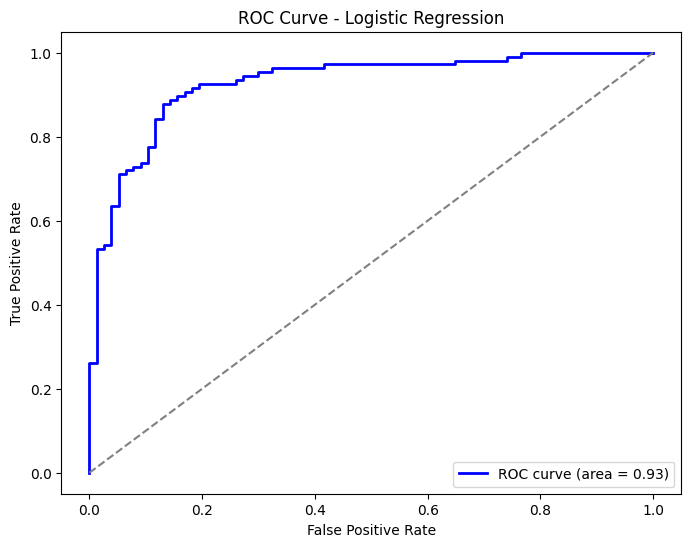

Logistic Regression Model Metrics:
Accuracy: 0.85
Precision: 0.90
Recall: 0.84
F1 Score: 0.87
ROC AUC: 0.93




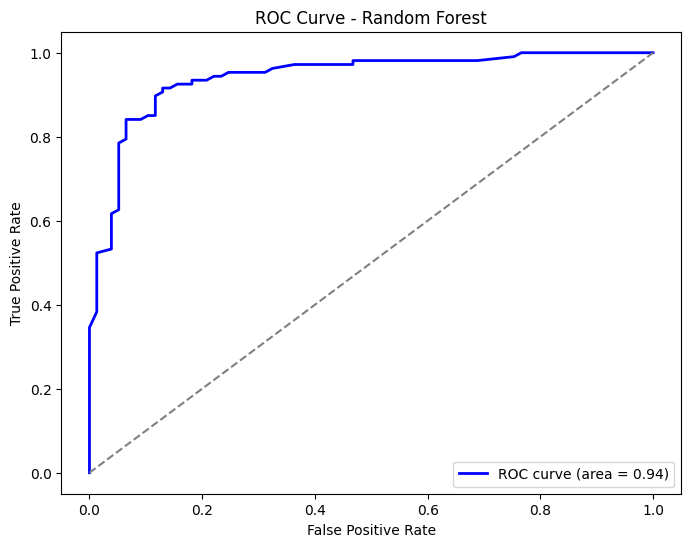

Random Forest Model Metrics:
Accuracy: 0.88
Precision: 0.91
Recall: 0.88
F1 Score: 0.90
ROC AUC: 0.94




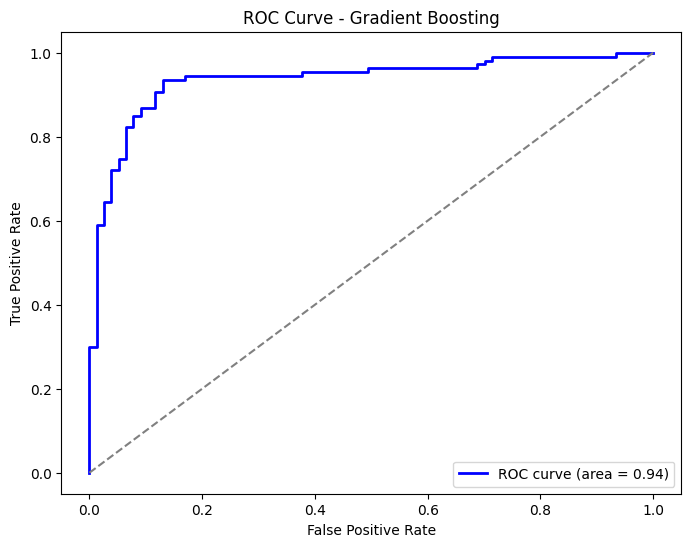

Gradient Boosting Model Metrics:
Accuracy: 0.88
Precision: 0.91
Recall: 0.88
F1 Score: 0.90
ROC AUC: 0.94




C:\Users\nikit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



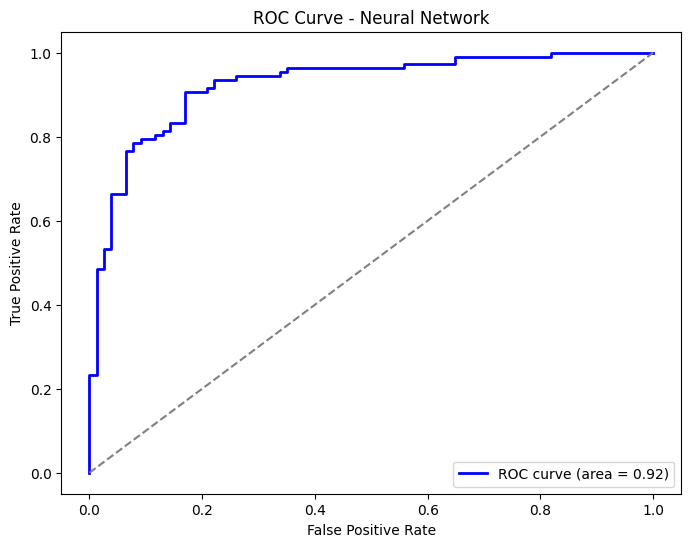

Neural Network Model Metrics:
Accuracy: 0.84
Precision: 0.88
Recall: 0.85
F1 Score: 0.86
ROC AUC: 0.92




,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.853261,0.900000,0.841121,0.869565,0.927418
Random Forest,0.880435,0.912621,0.878505,0.895238,0.941680
Gradient Boosting,0.880435,0.912621,0.878505,0.895238,0.935550
Neural Network,0.842391,0.875000,0.850467,0.862559,0.923899


In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to evaluate and plot ROC curve for each model
def evaluate_and_plot_roc(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    if y_pred_proba is not None:
        # Calculate ROC and AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
    else:
        fpr, tpr, roc_auc = None, None, None
    
    # Store metrics
    model_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }

    # Plot ROC curve if probabilities are available
    if roc_auc is not None:
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend(loc="lower right")
        plt.show()
    
    # Print out the metrics
    print(f"{name} Model Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.2f}")
    print("\n")
    
    # Save the trained model
    with open(f'{name}_model.pkl', 'wb') as f:
        pickle.dump(model, f)

# Train and evaluate each model with ROC plotting
for model_name, model in models.items():
    evaluate_and_plot_roc(model_name, model, X_train, y_train, X_test, y_test)

# Show all metrics
metrics_df = pd.DataFrame(model_metrics).T
metrics_df
